# PPplot

The notebook is using PPviz in order to plot the different graphs.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

## Data visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import json
import glob
import os
opj = os.path.join

# out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/All results 11 subjects (wo sub-013)'
out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/All results 12 subjects'
# out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/All results 16 (without 009 and 013)'
# out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics_slope/All results 17 (without 009)'
# out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/All results full subjects'
paths = glob.glob('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/*')

# List of subjects and corresponding sessions
# subjects = ['sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-010', 'sub-011', 'sub-012', 'sub-015', 'sub-018', 'sub-019', 'sub-020']
subjects = ['sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-010', 'sub-011', 'sub-012','sub-013', 'sub-015', 'sub-018', 'sub-019', 'sub-020']
# subjects = ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 'sub-011', 'sub-012', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']
# subjects = ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']
# subjects = ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009','sub-010', 'sub-011', 'sub-012', 'sub-013','sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']
sessions = ['ses-1', 'ses-2', 'ses-3']

# List comprehension to generate log paths
logpath = [p for p in paths if os.path.isdir(p) and any(f'{subject}_{session}' in p for subject in subjects for session in sessions)]

In [2]:
from PPviz import *

In [3]:
# task_viz = PPviz(paths, out_path)
task_viz = PPviz(logpath, out_path)

exception: date and time are not available, using date and time 2023-03-03 16:05:09
exception: date and time are not available, using date and time 2023-03-03 19:01:53
exception: date and time are not available, using date and time 2023-03-03 13:47:09


In [4]:
task_viz.fit_all()


fitting data...
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
CD fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit finished.
ASC fit fini

In [5]:
task_viz.plot_group()

CD group plot finished
ASC group plot finished.
SE group plot finished.
CS group plot finished
EHDB group plot finsihed
EHDB_CS group plot finsihed
Average_EHDB_CS group plot finsihed


In [ ]:
task_viz.plot_all()
pl.close('all')

In [ ]:
#data/group_results_average_EHDB_CS.csv
df_average_EHDB_CS = pd.read_csv(opj(out_path, 'data/group_results_average_EHDB_CS.csv'))
df_average_EHDB_CS

### Changing folder

In [ ]:
#move all the folders which starts with sub-001, sub-006, sub-007, sub-008, sub-009, sub-014 from /data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/ to /data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/artefact/
#move all the folders which starts with sub-002, sub-003, sub-004, sub-005, sub-010, sub-011, sub-012, sub-013 from /data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/* to /data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/psychophysics/*

import os
import shutil

destination_dir = "/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata"
source_dir = "/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/artefact"

# List of folder prefixes to move
prefixes_to_move = ["sub-001", "sub-006", "sub-007", "sub-008", "sub-009", "sub-014"]

# Iterate over files and folders in the source directory
for item in os.listdir(source_dir):
    item_path = os.path.join(source_dir, item)

    # Check if the item is a directory and its name starts with one of the specified prefixes
    if os.path.isdir(item_path) and any(item.startswith(prefix) for prefix in prefixes_to_move):
        # Construct the destination path by joining the destination directory and the item name
        destination_path = os.path.join(destination_dir, item)

        # Move the folder to the destination directory
        shutil.move(item_path, destination_path)
        print(f"Moved {item} to {destination_path}")


### Center surround task

let's try to understand better the data of CS

In [ ]:
event = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-013_ses-1_task-CS_run-1_Logs20230523125144/sub-013_ses-1_task-CS_run-1_events.tsv', sep='\t')
event

In [ ]:

event_9 = event[event['event_type'] == 'Response']
#display the number of 'key_pressed' equal 2 when 'presentation_order' equal 'ref second'
event_9[(event_9['key_pressed'] == 2) & (event_9['presentation_order'] == 'ref second')]
#display the number of 'key_pressed' equal 1 when 'presentation_order' equal 'ref first'
event_9[(event_9['key_pressed'] == 1) & (event_9['presentation_order'] == 'ref first')]



In [ ]:
event = event[event['event_type']=='Response']
#display the number of 'key_pressed' equal 2 when 'presentation_order' equal 'ref second'
print(event[(event['key_pressed'] == 2) & (event['presentation_order'] == 'ref second')])
#display the number of 'key_pressed' equal 1 when 'presentation_order' equal 'ref first'
print(event[(event['key_pressed'] == 1) & (event['presentation_order'] == 'ref first')])

In [ ]:

eventy = event['reference_contrast'][event['target_surround_presence']==True].unique()
eventy

In [ ]:
prob = []
for ctr in eventy:
                # for each contrast value, select the trials with that contrast value and with surround
                curr_ctr = event[(np.isclose(event['reference_contrast'],ctr,atol=1e-4)) & (event['target_surround_presence'] == True)]
                # calculate the proportion of correct responses for that contrast value by comparing the key pressed to the target position
                #for some arcane reason sometimes key pressed is a number, sometimes a string
                print(((curr_ctr['key_pressed'] == '2')|(curr_ctr['key_pressed'] == 2.0)|(np.array(curr_ctr['key_pressed']).astype(int) == 2)))
                print( (curr_ctr['presentation_order'] ==  'ref first'))
                print(((curr_ctr['key_pressed'] == '2')|(curr_ctr['key_pressed'] == 2.0)|(np.array(curr_ctr['key_pressed']).astype(int) == 2)) ^ (curr_ctr['presentation_order'] ==  'ref first'))
                prob.append(np.mean(((curr_ctr['key_pressed'] == '2')|(curr_ctr['key_pressed'] == 2.0)|(np.array(curr_ctr['key_pressed']).astype(int) == 2)) ^ (curr_ctr['presentation_order'] ==  'ref first')))
prob

DF

In [8]:
#now we need the full dataset 
df_CS = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/data/group_results_CS_regroup.csv')
df_CS

,Subject,Group_type,Session,Contrast_values,Actual,var,Contrast_values_nosurr,Actual_nosurr,var_nosurr,rel_effsize_diff
0,sub_001,10mg,ses_2,0.05,0.411765,-0.361765,0.05,0.235294,-0.185294,-45.96
1,sub_001,5mg,ses_3,0.05,0.000000,0.050000,0.05,0.000000,0.050000,-38.89
2,sub_001,placebo,ses_1,0.05,0.058824,-0.008824,0.05,0.058824,-0.008824,-31.82
3,sub_002,10mg,ses_3,0.05,0.352941,-0.302941,0.05,0.235294,-0.185294,-58.33
4,sub_002,5mg,ses_1,0.05,0.235294,-0.185294,0.05,0.235294,-0.185294,-58.33
5,sub_002,placebo,ses_2,0.05,0.058824,-0.008824,0.05,0.058824,-0.008824,-49.49
6,sub_003,10mg,ses_2,0.05,0.352941,-0.302941,0.05,0.058824,-0.008824,-68.94
7,sub_003,5mg,ses_1,0.05,0.470588,-0.420588,0.05,0.235294,-0.185294,-67.17
8,sub_003,placebo,ses_3,0.05,0.294118,-0.244118,0.05,0.117647,-0.067647,-65.40
9,sub_004,10mg,ses_1,0.05,0.588235,-0.538235,0.05,0.000000,0.050000,-81.31


In [5]:
#check the balance of the data
df_CS['Group_type'].value_counts()


Group_type
10mg       18
5mg        18
placebo    18
Name: count, dtype: int64

In [ ]:
#sub_009 ses-1 values to *-1
df_CS.loc[(df_CS['Subject'] == 'sub_009') & (df_CS['Session'] == 'ses_1'), 'rel_effsize_diff'] = df_CS.loc[(df_CS['Subject'] == 'sub_009') & (df_CS['Session'] == 'ses_1'), 'rel_effsize_diff']*-1
df_CS.loc[(df_CS['Subject'] == 'sub_009') & (df_CS['Session'] == 'ses_2'), 'rel_effsize_diff'] = df_CS.loc[(df_CS['Subject'] == 'sub_009') & (df_CS['Session'] == 'ses_2'), 'rel_effsize_diff']*-1
df_CS.loc[(df_CS['Subject'] == 'sub_009') & (df_CS['Session'] == 'ses_3'), 'rel_effsize_diff'] = df_CS.loc[(df_CS['Subject'] == 'sub_009') & (df_CS['Session'] == 'ses_3'), 'rel_effsize_diff']*-1

df_CS

In [9]:
#get rid of subject 9
df_CS = df_CS[df_CS['Subject']!='sub_009']
df_CS['Group_type'].value_counts()


Group_type
placebo    187
10mg       187
5mg        187
Name: count, dtype: int64

ANOVA

In [6]:
#ANOVA
#Null Hypothesis (H0): There is no significant difference in the means of rel_effsize_difference, across the different group_type levels (placebo, 5mg, 10mg)

In [49]:
#1-way simple ANOVA
import scipy.stats as stats

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(df_CS['rel_effsize_diff'][df_CS['Group_type'] == 'placebo'],
                               df_CS['rel_effsize_diff'][df_CS['Group_type'] == '5mg'],
                               df_CS['rel_effsize_diff'][df_CS['Group_type'] == '10mg'])

print("One-Way ANOVA all subjects Results:")
# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)

#without sub-009
#get rid of subject 9
df_CS_w9 = df_CS[df_CS['Subject']!='sub_009']

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(df_CS_w9['rel_effsize_diff'][df_CS_w9['Group_type'] == 'placebo'],
                               df_CS_w9['rel_effsize_diff'][df_CS_w9['Group_type'] == '5mg'],
                               df_CS_w9['rel_effsize_diff'][df_CS_w9['Group_type'] == '10mg'])

print("One-Way ANOVA all subjects without sub-009 Results:")
# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)

#without sub-013
#get rid of subject 13
df_CS_w13 = df_CS[df_CS['Subject']!='sub_013']

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(df_CS_w13['rel_effsize_diff'][df_CS_w13['Group_type'] == 'placebo'],
                               df_CS_w13['rel_effsize_diff'][df_CS_w13['Group_type'] == '5mg'],
                               df_CS_w13['rel_effsize_diff'][df_CS_w13['Group_type'] == '10mg'])

print("One-Way ANOVA all subjects without sub-013 Results:")
# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)

#without sub-013 and sub-009
#get rid of subject 13 and subject 9
df_CS_w13_w9 = df_CS_w9[df_CS_w9['Subject']!='sub_013']

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(df_CS_w13_w9['rel_effsize_diff'][df_CS_w13_w9['Group_type'] == 'placebo'],
                                 df_CS_w13_w9['rel_effsize_diff'][df_CS_w13_w9['Group_type'] == '5mg'],
                                    df_CS_w13_w9['rel_effsize_diff'][df_CS_w13_w9['Group_type'] == '10mg'])

print("One-Way ANOVA all subjects without sub-013 and sub-009 Results:")
# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)


#subjects without artifacts
df_CS_regroup_without_artifacts = df_CS[df_CS['Subject']!='sub_001']
df_CS_regroup_without_artifacts = df_CS_regroup_without_artifacts[df_CS_regroup_without_artifacts['Subject']!='sub_006']
df_CS_regroup_without_artifacts = df_CS_regroup_without_artifacts[df_CS_regroup_without_artifacts['Subject']!='sub_007']
df_CS_regroup_without_artifacts = df_CS_regroup_without_artifacts[df_CS_regroup_without_artifacts['Subject']!='sub_008']
df_CS_regroup_without_artifacts = df_CS_regroup_without_artifacts[df_CS_regroup_without_artifacts['Subject']!='sub_009']
df_CS_regroup_without_artifacts = df_CS_regroup_without_artifacts[df_CS_regroup_without_artifacts['Subject']!='sub_014']

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(df_CS_regroup_without_artifacts['rel_effsize_diff'][df_CS_regroup_without_artifacts['Group_type'] == 'placebo'],
                               df_CS_regroup_without_artifacts['rel_effsize_diff'][df_CS_regroup_without_artifacts['Group_type'] == '5mg'],
                               df_CS_regroup_without_artifacts['rel_effsize_diff'][df_CS_regroup_without_artifacts['Group_type'] == '10mg'])

print("One-Way ANOVA all subjects without_artifacts Results:")
# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)

#without sub-013
#get rid of subject 13
df_CS_regroup_w13_without_artifacts = df_CS_regroup_without_artifacts[df_CS_regroup_without_artifacts['Subject']!='sub_013']

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(df_CS_regroup_w13_without_artifacts['rel_effsize_diff'][df_CS_regroup_w13_without_artifacts['Group_type'] == 'placebo'],
                               df_CS_regroup_w13_without_artifacts['rel_effsize_diff'][df_CS_regroup_w13_without_artifacts['Group_type'] == '5mg'],
                               df_CS_regroup_w13_without_artifacts['rel_effsize_diff'][df_CS_regroup_w13_without_artifacts['Group_type'] == '10mg'])

print("One-Way ANOVA all subjects without_artifacts without sub-013 Results:")
# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)



One-Way ANOVA all subjects Results:
Two-Way ANOVA Results:
F-statistic: 0.2187959909389259
p-value: 0.8042358834925872
One-Way ANOVA all subjects without sub-009 Results:
Two-Way ANOVA Results:
F-statistic: 0.2774217426866128
p-value: 0.7589414842627072
One-Way ANOVA all subjects without sub-013 Results:
Two-Way ANOVA Results:
F-statistic: 1.0212194316998395
p-value: 0.3678463766480327
One-Way ANOVA all subjects without sub-013 and sub-009 Results:
Two-Way ANOVA Results:
F-statistic: 1.2648751139836127
p-value: 0.29211717278319854
One-Way ANOVA all subjects without_artifacts Results:
Two-Way ANOVA Results:
F-statistic: 0.07913517819327062
p-value: 0.9240898111957313
One-Way ANOVA all subjects without_artifacts without sub-013 Results:
Two-Way ANOVA Results:
F-statistic: 0.8391665282392029
p-value: 0.4419610663370225


In [50]:
#Repeated Measures ANOVA

from statsmodels.stats.anova import AnovaRM
#fit RM ANOVA 
aovrm2way = AnovaRM(df_CS, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects Results:")
print(res2way)

#fit RM anova without sub-009
aovrm2way = AnovaRM(df_CS_w9, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-009 Results:")
print(res2way)

#fit RM ANOVA without sub-013
aovrm2way = AnovaRM(df_CS_w13, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 Results:")
print(res2way)

#fit RM ANOVA without sub-013 and sub-009
aovrm2way = AnovaRM(df_CS_w13_w9, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 and sub-009 Results:")
print(res2way)

#fit RM ANOVA without artifacts
aovrm2way = AnovaRM(df_CS_regroup_without_artifacts, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts Results:")
print(res2way)

#fit RM ANOVA without sub-013 and artifacts
aovrm2way = AnovaRM(df_CS_regroup_w13_without_artifacts, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts without sub-013 Results:")
print(res2way)



RM ANOVA all subjects Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  0.4997 2.0000 34.0000 0.6111

RM ANOVA all subjects without sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  0.5844 2.0000 32.0000 0.5633

RM ANOVA all subjects without sub-013 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  5.3125 2.0000 32.0000 0.0102

RM ANOVA all subjects without sub-013 and sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  6.3104 2.0000 30.0000 0.0052

RM ANOVA all subjects without_artifacts Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  0.1444 2.0000 22.0000 0.8664

RM ANOVA all subjects without_ar

In [51]:
from statsmodels.stats.anova import AnovaRM

#fit RM ANOVA 
aovrm2way = AnovaRM(df_CS, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.median)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects Results:")
print(res2way)

#fit RM ANOVA without sub-013
aovrm2way = AnovaRM(df_CS_w13, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.median)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 Results:")
print(res2way)

#fit RM ANOVA without sub-013 and sub-009
aovrm2way = AnovaRM(df_CS_w13_w9, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.median)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 and sub-009 Results:")
print(res2way)

#fit RM ANOVA without sub-013 and artifacts
aovrm2way = AnovaRM(df_CS_regroup_without_artifacts, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.median)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts Results:")
print(res2way)

#fit RM ANOVA without sub-013 and artifacts
aovrm2way = AnovaRM(df_CS_regroup_w13_without_artifacts, 'rel_effsize_diff', 'Subject', within=['Group_type'], aggregate_func=np.median)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts without sub-013 Results:")
print(res2way)


RM ANOVA all subjects Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  0.4997 2.0000 34.0000 0.6111

RM ANOVA all subjects without sub-013 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  5.3125 2.0000 32.0000 0.0102

RM ANOVA all subjects without sub-013 and sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  6.3104 2.0000 30.0000 0.0052

RM ANOVA all subjects without_artifacts Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  0.1444 2.0000 22.0000 0.8664

RM ANOVA all subjects without_artifacts without sub-013 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  4.0683 2.0000 20.0000 0.0329



MLM

In [17]:
groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],

              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],

              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}

In [ ]:
#df_CS subjects unique
df_CS['Subject'].unique()

In [53]:
from statsmodels.regression.mixed_linear_model import MixedLM

#MLM with all subjects
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects')
print(mlm_res.summary())

#MLM without sub-009
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM all subjects without sub-009')
print(mlm_res.summary())

#MLM without sub-013
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013')
print(mlm_res.summary())

#MLM without sub-013 and sub-009
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_010', 'sub_011', 'sub_012', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013 and sub-009')
print(mlm_res.summary())

#MLM without artifacts
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in [ 'sub_002', 'sub_003', 'sub_004', 'sub_005','sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
        
            red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM without artifacts')
print(mlm_res.summary())

#MLM without sub-013 and artifacts
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in [ 'sub_002', 'sub_003', 'sub_004', 'sub_005','sub_010', 'sub_011', 'sub_012', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
        
            red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM without artifacts without sub-013')
print(mlm_res.summary())

/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


MLM with all subjects
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 54      Method:             REML     
No. Groups:       1       Scale:              478.5113 
Min. group size:  54      Log-Likelihood:     -239.6182
Max. group size:  54      Converged:          Yes      
Mean group size:  54.0                                 
-------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------
const      -51.885   22.376 -2.319 0.020 -95.740 -8.030
x1          -0.452    0.729 -0.619 0.536  -1.881  0.977
Group Var  478.511                                     

MLM all subjects without sub-009
           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  y        
No. Observations:    51       Method:              REML     
No. Groups:          1        Scale:               461

/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


CS_data

In [6]:
CS_data = np.load(opj(out_path,'data/CS_data.npy'), allow_pickle=True).item()
len(CS_data.keys())
CS_data

{'sub-001': {'ses-1': {'group': 'placebo',
   'contrast_values': array([0.05      , 0.14188612, 0.2       , 0.23675445, 0.26      ,
          0.3       , 0.34      , 0.37325683, 0.43416408, 0.54571088,
          0.75      ]),
   'probs': array([0.05882353, 0.35294118, 0.35294118, 0.52941176, 0.52941176,
          0.76470588, 0.64705882, 0.70588235, 0.70588235, 1.        ,
          1.        ]),
   'diff': array([-0.00882353, -0.21105506, -0.15294118, -0.29265732, -0.26941176,
          -0.46470588, -0.30705882, -0.33262552, -0.27171827, -0.45428912,
          -0.25      ]),
   'contrast_values_nosurr': array([0.05      , 0.19649924, 0.2816784 , 0.33120419, 0.36      ,
          0.4       , 0.44      , 0.46879581, 0.5183216 , 0.60350076,
          0.75      ]),
   'probs_nosurr': array([0.05882353, 0.23529412, 0.17647059, 0.35294118, 0.64705882,
          0.64705882, 0.58823529, 0.52941176, 0.94117647, 1.        ,
          1.        ]),
   'diff_nosurr': array([-0.00882353, -0.0387948

In [7]:
CS_data2 = {}

#all sub, all ses but 0
for k, v in CS_data.items():
    #print(k)
    #print(v)
    CS_data2[k] = {}
    for l, m in v.items():
        
        if l != 'ses-0':
            CS_data2[k].update({l:{}})
            #print(m)
            #print(m['rel_effsize'])
            #print(m['rel_effsize_nosurr'])
            #print(l)
            CS_data2[k][l]['rel_effsize'] = m['rel_effsize']
            CS_data2[k][l]['rel_effsize_nosurr'] = m['rel_effsize_nosurr']
            CS_data2[k][l]['group'] = m['group']
            CS_data2[k][l]['rel_effsize_difference'] = m['rel_effsize'] - m['rel_effsize_nosurr']

CS_data2

{'sub-001': {'ses-1': {'rel_effsize': -39.7727272727273,
   'rel_effsize_nosurr': -7.954545454545464,
   'group': 'placebo',
   'rel_effsize_difference': -31.818181818181838},
  'ses-2': {'rel_effsize': -60.98484848484851,
   'rel_effsize_nosurr': -15.025252525252538,
   'group': '10mg',
   'rel_effsize_difference': -45.95959595959597},
  'ses-3': {'rel_effsize': -48.61111111111114,
   'rel_effsize_nosurr': -9.722222222222229,
   'group': '5mg',
   'rel_effsize_difference': -38.888888888888914}},
 'sub-002': {'ses-2': {'rel_effsize': -50.378787878787904,
   'rel_effsize_nosurr': -0.8838383838384034,
   'group': 'placebo',
   'rel_effsize_difference': -49.4949494949495},
  'ses-1': {'rel_effsize': -64.52020202020205,
   'rel_effsize_nosurr': -6.186868686868698,
   'group': '5mg',
   'rel_effsize_difference': -58.33333333333335},
  'ses-3': {'rel_effsize': -62.752525252525274,
   'rel_effsize_nosurr': -4.419191919191934,
   'group': '10mg',
   'rel_effsize_difference': -58.33333333333334

In [ ]:
CS_data2['sub-009']['ses-1']['rel_effsize_difference'] = CS_data2['sub-009']['ses-1']['rel_effsize_difference']*-1
CS_data2['sub-009']['ses-2']['rel_effsize_difference'] = CS_data2['sub-009']['ses-2']['rel_effsize_difference']*-1
CS_data2['sub-009']['ses-3']['rel_effsize_difference'] = CS_data2['sub-009']['ses-3']['rel_effsize_difference']*-1
CS_data2['sub-009']

In [ ]:
CS_data2.keys()

In [28]:
#CS_data4 where you have only the 'rel_effsize_difference' and the group
CS_data4 = {}
for k, v in CS_data2.items():
    CS_data4[k] = {}
    for l, m in v.items():
        CS_data4[k][l] = {}
        CS_data4[k][l]['rel_effsize_difference'] = m['rel_effsize_difference']
        CS_data4[k][l]['group'] = m['group']

#change data from sub-009 to *-1
CS_data4['sub-009']['ses-1']['rel_effsize_difference'] = CS_data4['sub-009']['ses-1']['rel_effsize_difference']*-1
CS_data4['sub-009']['ses-2']['rel_effsize_difference'] = CS_data4['sub-009']['ses-2']['rel_effsize_difference']*-1
CS_data4['sub-009']['ses-3']['rel_effsize_difference'] = CS_data4['sub-009']['ses-3']['rel_effsize_difference']*-1

CS_data4

{'sub-001': {'ses-1': {'rel_effsize_difference': -31.818181818181838,
   'group': 'placebo'},
  'ses-2': {'rel_effsize_difference': -45.95959595959597, 'group': '10mg'},
  'ses-3': {'rel_effsize_difference': -38.888888888888914, 'group': '5mg'}},
 'sub-002': {'ses-2': {'rel_effsize_difference': -49.4949494949495,
   'group': 'placebo'},
  'ses-1': {'rel_effsize_difference': -58.33333333333335, 'group': '5mg'},
  'ses-3': {'rel_effsize_difference': -58.33333333333334, 'group': '10mg'}},
 'sub-003': {'ses-2': {'rel_effsize_difference': -68.93939393939394,
   'group': '10mg'},
  'ses-1': {'rel_effsize_difference': -67.17171717171718, 'group': '5mg'},
  'ses-3': {'rel_effsize_difference': -65.40404040404042, 'group': 'placebo'}},
 'sub-004': {'ses-1': {'rel_effsize_difference': -81.31313131313134,
   'group': '10mg'},
  'ses-3': {'rel_effsize_difference': -91.91919191919193, 'group': '5mg'},
  'ses-2': {'rel_effsize_difference': -83.0808080808081, 'group': 'placebo'}},
 'sub-005': {'ses-3'

In [ ]:
# get rid of sub-009
CS_data4 = {k:v for k,v in CS_data4.items() if k != 'sub-009'}
#order the data by subject
CS_data4 = dict(sorted(CS_data4.items()))
CS_data4

ANOVA

In [ ]:
#H0 = There is no significant difference in the means of rel_effsize_difference, across the different group_type levels (placebo, 5mg, 10mg)
from statsmodels.stats.anova import AnovaRM

aovrm2way = AnovaRM(CS_data4, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print(res2way)

In [ ]:
import scipy.stats as stats
#one way anova

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(CS_data4['rel_effsize_difference'][CS_data4['Group_type'] == 'placebo'],
                               CS_data4['rel_effsize_difference'][CS_data4['Group_type'] == '5mg'],
                               CS_data4['rel_effsize_difference'][CS_data4['Group_type'] == '10mg'])

# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)

#without sub-013
#get rid of subject 13

CS_data4 = {k:v for k,v in CS_data4.items() if k != 'sub-013'}
#order the data by subject
CS_data4 = dict(sorted(CS_data4.items()))

# Fit a one-way ANOVA
one_way_anova = stats.f_oneway(CS_data4['rel_effsize_difference'][CS_data4['Group_type'] == 'placebo'],
                               CS_data4['rel_effsize_difference'][CS_data4['Group_type'] == '5mg'],
                               CS_data4['rel_effsize_difference'][CS_data4['Group_type'] == '10mg'])

# Print the ANOVA results
print("Two-Way ANOVA Results:")
print("F-statistic:", one_way_anova.statistic)
print("p-value:", one_way_anova.pvalue)

ANOVA with slope

In [ ]:
#Weighted RMAnova with all subjects
from statsmodels.regression.mixed_linear_model import MixedLM



MLM

In [ ]:
CS_data4.keys()

In [ ]:
from statsmodels.regression.mixed_linear_model import MixedLM

#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #if s in ['sub-002', 'sub-003','sub-004', 'sub-005','sub-010', 'sub-011','sub-012','sub-015','sub-018','sub-019','sub-020']:
        if s in ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:
            endog = np.append(endog, CS_data4[s][j]['rel_effsize'])
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

print(CS_data4.keys())
print(endog)
print(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
print(exog)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print(mlm_res.summary())

### Ebbinghaus illusion 

In [ ]:
#let's understand better the data of EB
event = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-013_ses-1_task-EH_run-1_Logs20230523122726/sub-013_ses-1_task-EH_run-1_events.tsv', sep='\t')
event = event[event['event_type'] == 'Response']
event

EHDB_data

In [8]:
EHDB_data = np.load(opj(out_path,'data/EHDB_data.npy'), allow_pickle=True).item()
#get rid of ses 0 
EHDB_data = {k: v for k, v in EHDB_data.items() if 'ses-0' not in k}
#create a new variable rel_effesize_difference which is the difference between the rel_effsize['0.9375'] and rel_effsize['0.0]'
for k, v in EHDB_data.items():
    for b, n in v.items():
        n['rel_effsize_difference'] = n['rel_effsize']['0.9375'] - n['rel_effsize']['0.0']

#order EHDB_data by subject (1st items) and sessions (2nd items)
EHDB_data = dict(sorted(EHDB_data.items()))

EHDB_data

{'sub-001': {'ses-3': {'group_type': '5mg',
   'surr_sizes': array([0.9375, 0.    ]),
   'size_values': {'0.9375': array([0.55625   , 0.7703125 , 0.64388006, 0.48436782, 0.44333244,
           0.50625   , 0.58431365, 0.53125   , 0.36637931]),
    '0.0': array([0.8125    , 0.625     , 0.54458224, 0.58016203, 0.6       ,
           0.67393585, 0.48076923, 0.72078868, 0.65      ])},
   'x_spaces': {'0.9375': array([0.36637931, 0.37045944, 0.37453958, 0.37861971, 0.38269984,
           0.38677998, 0.39086011, 0.39494024, 0.39902038, 0.40310051,
           0.40718064, 0.41126078, 0.41534091, 0.41942104, 0.42350118,
           0.42758131, 0.43166144, 0.43574158, 0.43982171, 0.44390184,
           0.44798197, 0.45206211, 0.45614224, 0.46022237, 0.46430251,
           0.46838264, 0.47246277, 0.47654291, 0.48062304, 0.48470317,
           0.48878331, 0.49286344, 0.49694357, 0.50102371, 0.50510384,
           0.50918397, 0.51326411, 0.51734424, 0.52142437, 0.52550451,
           0.52958464, 0.53

In [20]:
EHDB_data2 = {}

#all sub, all ses but 0
for k, v in EHDB_data.items():
    #print(k)
    #print(v)
    EHDB_data2[k] = {}
    for l, m in v.items():
        
        #print(l)
        if l == 'ses-0':
            print('bla ses-0')
            #remove ses-0
            #del CS_data[k][l]
            
        elif l != 'ses-0':
            EHDB_data2[k].update({l:{}})
            #print(m)
            #print(m['rel_effsize'])
            #print(m['rel_effsize_nosurr'])
            #print(l)
            
            EHDB_data2[k][l]['group_type'] = m['group_type']
            EHDB_data2[k][l]['rel_effsize_difference'] = m['rel_effsize_difference']

# EHDB_data2

In [21]:
EHDB_data2

{'sub-001': {'ses-3': {'group_type': '5mg',
   'rel_effsize_difference': -0.22825737480909325},
  'ses-1': {'group_type': 'placebo',
   'rel_effsize_difference': -3.9118037135278527},
  'ses-2': {'group_type': '10mg',
   'rel_effsize_difference': -4.914697371593917}},
 'sub-002': {'ses-2': {'group_type': 'placebo',
   'rel_effsize_difference': -7.595350052246594},
  'ses-3': {'group_type': '10mg',
   'rel_effsize_difference': -2.420102885620139},
  'ses-1': {'group_type': '5mg',
   'rel_effsize_difference': -6.220340004822766}},
 'sub-003': {'ses-1': {'group_type': '5mg',
   'rel_effsize_difference': -10.487340245960937},
  'ses-2': {'group_type': '10mg',
   'rel_effsize_difference': -9.601137368378758},
  'ses-3': {'group_type': 'placebo',
   'rel_effsize_difference': -7.2926010770838445}},
 'sub-004': {'ses-3': {'group_type': '5mg',
   'rel_effsize_difference': -7.759364199019352},
  'ses-2': {'group_type': 'placebo',
   'rel_effsize_difference': -7.9454223936982515},
  'ses-1': {'gr

DF

In [7]:
#group_results_EHDB.csv
#load the data
df_EHDB = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/data/group_results_EHDB_full.csv')
#get rid of sessions = ses-0
df_EHDB = df_EHDB[df_EHDB['Session']!='ses_0']
df_EHDB

,Subject,Session,Group_type,rel_effsize_difference
0,sub_001,ses_1,placebo,-3.911804
1,sub_001,ses_2,10mg,-4.914697
2,sub_001,ses_3,5mg,-0.228257
4,sub_002,ses_1,5mg,-6.220340
5,sub_002,ses_2,placebo,-7.595350
6,sub_002,ses_3,10mg,-2.420103
8,sub_003,ses_1,5mg,-10.487340
9,sub_003,ses_2,10mg,-9.601137
10,sub_003,ses_3,placebo,-7.292601
12,sub_004,ses_1,10mg,-10.790089


In [67]:
#check balance of data 
df_EHDB['Group_type'].value_counts()


Group_type
placebo    18
10mg       18
5mg        18
Name: count, dtype: int64

ANOVA

In [72]:
#H0 = There is no significant difference in the means of rel_effsize_difference, across the different group_type levels (placebo, 5mg, 10mg)
from statsmodels.stats.anova import AnovaRM

#All subjects
aovrm2way = AnovaRM(df_EHDB, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects Results:")
print(res2way)

#All subjects without sub-013
df_EHDB_w13 = df_EHDB[df_EHDB['Subject']!='sub_013']
aovrm2way = AnovaRM(df_EHDB_w13, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 Results:")
print(res2way)

#All subjects without sub-009
df_EHDB_w9 = df_EHDB[df_EHDB['Subject']!='sub_009']
aovrm2way = AnovaRM(df_EHDB_w9, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-009 Results:")
print(res2way)

#All subjects without sub-013 and sub-009
df_EHDB_w13_w9 = df_EHDB_w13[df_EHDB_w13['Subject']!='sub_009']
aovrm2way = AnovaRM(df_EHDB_w13_w9, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 and sub-009 Results:")
print(res2way)

#All subjects without artifacts
df_EHDB_without_artifacts = df_EHDB[df_EHDB['Subject']!='sub_001']
df_EHDB_without_artifacts = df_EHDB_without_artifacts[df_EHDB_without_artifacts['Subject']!='sub_006']
df_EHDB_without_artifacts = df_EHDB_without_artifacts[df_EHDB_without_artifacts['Subject']!='sub_007']
df_EHDB_without_artifacts = df_EHDB_without_artifacts[df_EHDB_without_artifacts['Subject']!='sub_008']
df_EHDB_without_artifacts = df_EHDB_without_artifacts[df_EHDB_without_artifacts['Subject']!='sub_009']
df_EHDB_without_artifacts = df_EHDB_without_artifacts[df_EHDB_without_artifacts['Subject']!='sub_014']

aovrm2way = AnovaRM(df_EHDB_without_artifacts, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts Results:")
print(res2way)

#All subjects without artifacts and sub-013
df_EHDB_w13_without_artifacts = df_EHDB_without_artifacts[df_EHDB_without_artifacts['Subject']!='sub_013']
aovrm2way = AnovaRM(df_EHDB_w13_without_artifacts, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts without sub-013 Results:")
print(res2way)


RM ANOVA all subjects Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  3.4372 2.0000 34.0000 0.0437

RM ANOVA all subjects without sub-013 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  3.2877 2.0000 32.0000 0.0503

RM ANOVA all subjects without sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  2.8776 2.0000 32.0000 0.0709

RM ANOVA all subjects without sub-013 and sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  2.7735 2.0000 30.0000 0.0785

RM ANOVA all subjects without_artifacts Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  1.1558 2.0000 22.0000 0.3332

RM ANOVA all subjects without_ar

Check normality of the data

-6.414465164465162
-8.101010101010102
-9.528421929283995
Statistics=0.973, p=0.855
placebo_data looks Gaussian (fail to reject H0)
Statistics=0.922, p=0.143
mg5_data looks Gaussian (fail to reject H0)
Statistics=0.878, p=0.024
mg10_data does not look Gaussian (reject H0)


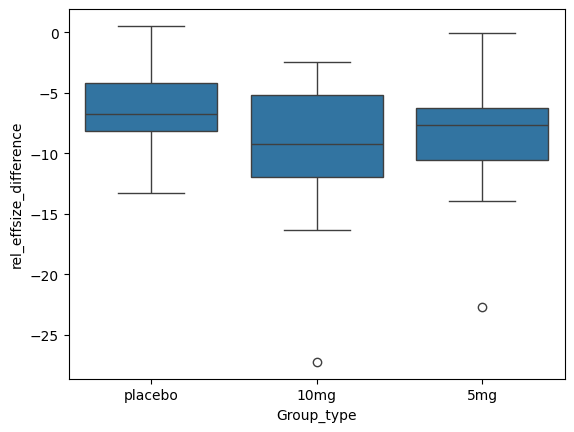

In [20]:
from scipy.stats import f_oneway

# Filter the DataFrame to get data for each group_type
placebo_data = df_EHDB[df_EHDB['Group_type'] == 'placebo']['rel_effsize_difference']
mg5_data = df_EHDB[df_EHDB['Group_type'] == '5mg']['rel_effsize_difference']
mg10_data = df_EHDB[df_EHDB['Group_type'] == '10mg']['rel_effsize_difference']

print(np.mean(placebo_data))
print(np.mean(mg5_data))
print(np.mean(mg10_data))

#check normality of the data
from scipy.stats import shapiro
stat, p = shapiro(placebo_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('placebo_data looks Gaussian (fail to reject H0)')
else:
    print('placebo_data does not look Gaussian (reject H0)')

stat, p = shapiro(mg5_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('mg5_data looks Gaussian (fail to reject H0)')
else:
    print('mg5_data does not look Gaussian (reject H0)')

stat, p = shapiro(mg10_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('mg10_data looks Gaussian (fail to reject H0)')
else:
    print('mg10_data does not look Gaussian (reject H0)')

#boxplot
import seaborn as sns
sns.boxplot(x='Group_type', y='rel_effsize_difference', data=df_EHDB)
plt.show()


In [21]:
#run a  Kruskal-Wallis Test
from scipy.stats import kruskal
f, p = kruskal(df_EHDB[df_EHDB['Group_type'] == 'placebo']['rel_effsize_difference'], df_EHDB[df_EHDB['Group_type'] == '5mg']['rel_effsize_difference'], df_EHDB[df_EHDB['Group_type'] == '10mg']['rel_effsize_difference'])
print("KW test all subjects Results:")
print('F-value : ', f )
print('p-value : ', p)

#run a  Kruskal-Wallis Test without sub-009
f, p = kruskal(df_EHDB_w13_w9[df_EHDB_w13_w9['Group_type'] == 'placebo']['rel_effsize_difference'], df_EHDB_w13_w9[df_EHDB_w13_w9['Group_type'] == '5mg']['rel_effsize_difference'], df_EHDB_w13_w9[df_EHDB_w13_w9['Group_type'] == '10mg']['rel_effsize_difference'])
print("KW test all subjects without sub-009 Results:")
print('F-value : ', f )
print('p-value : ', p)

#run a  Kruskal-Wallis Test without sub-013
f, p = kruskal(df_EHDB_w13[df_EHDB_w13['Group_type'] == 'placebo']['rel_effsize_difference'], df_EHDB_w13[df_EHDB_w13['Group_type'] == '5mg']['rel_effsize_difference'], df_EHDB_w13[df_EHDB_w13['Group_type'] == '10mg']['rel_effsize_difference'])
print("KW test all subjects without sub-013 Results:")
print('F-value : ', f )
print('p-value : ', p)

#run a  Kruskal-Wallis Test without sub-013 and sub-009
f, p = kruskal(df_EHDB_w13_w9[df_EHDB_w13_w9['Group_type'] == 'placebo']['rel_effsize_difference'], df_EHDB_w13_w9[df_EHDB_w13_w9['Group_type'] == '5mg']['rel_effsize_difference'], df_EHDB_w13_w9[df_EHDB_w13_w9['Group_type'] == '10mg']['rel_effsize_difference'])
print("KW test all subjects without sub-013 and sub-009 Results:")
print('F-value : ', f )
print('p-value : ', p)

#run a  Kruskal-Wallis Test and artifacts
f, p = kruskal(df_EHDB_without_artifacts[df_EHDB_without_artifacts['Group_type'] == 'placebo']['rel_effsize_difference'], df_EHDB_without_artifacts[df_EHDB_without_artifacts['Group_type'] == '5mg']['rel_effsize_difference'], df_EHDB_without_artifacts[df_EHDB_without_artifacts['Group_type'] == '10mg']['rel_effsize_difference'])
print("KW test all subjects without_artifacts Results:")
print('F-value : ', f )
print('p-value : ', p)

#run a  Kruskal-Wallis Test without sub-013 and artifacts
f, p = kruskal(df_EHDB_w13_without_artifacts[df_EHDB_w13_without_artifacts['Group_type'] == 'placebo']['rel_effsize_difference'], df_EHDB_w13_without_artifacts[df_EHDB_w13_without_artifacts['Group_type'] == '5mg']['rel_effsize_difference'], df_EHDB_w13_without_artifacts[df_EHDB_w13_without_artifacts['Group_type'] == '10mg']['rel_effsize_difference'])
print("KW test all subjects without_artifacts without sub-013 Results:")
print('F-value : ', f )
print('p-value : ', p)


KW test all subjects Results:
F-value :  2.417439860359086
p-value :  0.29857923718196777
KW test all subjects without sub-009 Results:
F-value :  2.364387624891385
p-value :  0.3066053655772197
KW test all subjects without sub-013 Results:
F-value :  2.4886570597821165
p-value :  0.28813431677051493
KW test all subjects without sub-013 and sub-009 Results:
F-value :  2.364387624891385
p-value :  0.3066053655772197
KW test all subjects without_artifacts Results:
F-value :  0.18362945796317806
p-value :  0.9122741518501757
KW test all subjects without_artifacts without sub-013 Results:
F-value :  0.18820096653597873
p-value :  0.9101912986493799


MLM

In [67]:
from statsmodels.regression.mixed_linear_model import MixedLM

#MLM with all subjects
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects')
print(mlm_res.summary())

#MLM without sub-009
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM all subjects without sub-009')
print(mlm_res.summary())

#MLM without sub-013
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013')
print(mlm_res.summary())

#MLM without sub-013 and sub-009
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_010', 'sub_011', 'sub_012', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
            red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013 and sub-009')
print(mlm_res.summary())

#MLM without artifacts
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in [ 'sub_002', 'sub_003', 'sub_004', 'sub_005','sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
        
            red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM without artifacts')
print(mlm_res.summary())

#MLM without sub-013 and artifacts
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]

        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in [ 'sub_002', 'sub_003', 'sub_004', 'sub_005','sub_010', 'sub_011', 'sub_012', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
        
            red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
            endog = np.append(endog, red)
            exog = np.append(exog, doses[group])
            groups_unused = np.append(groups_unused, 0)
            #print(s)
            #print(group)
            #print(red)
            
#print(len(endog))
#print(len(exog))
#print(len(groups_unused))
endog = np.array(endog)
exog = np.array(exog)
import statsmodels.api as sm
exog = sm.add_constant(exog)
groups_unused = np.array(groups_unused)


#print(endog)
#print(exog)
#print(groups_unused)
mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM without artifacts without sub-013')
print(mlm_res.summary())

/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


MLM with all subjects
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 54      Method:             REML     
No. Groups:       1       Scale:              25.3839  
Min. group size:  54      Log-Likelihood:     -163.2675
Max. group size:  54      Converged:          Yes      
Mean group size:  54.0                                 
-------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------
const       -6.458    5.154 -1.253 0.210 -16.558  3.643
x1          -0.311    0.168 -1.854 0.064  -0.641  0.018
Group Var   25.384                                     

MLM all subjects without sub-009
          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  y        
No. Observations:  51       Method:              REML     
No. Groups:        1        Scale:               25.4829  


/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### EHDB + CS

MLM (considered as two different groups)

In [59]:
#MLM with both groups
from statsmodels.regression.mixed_linear_model import MixedLM

endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
                red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

                red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')

                

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)
print(endog)
# print(len(endog))
print(exog)
# print(len(exog))
print(groups_unused)
# print(len(groups_unused))
import statsmodels.api as sm
exog = sm.add_constant(exog)

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects')
print(mlm_res.summary())

#MLM without sub-009
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
                red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

                red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')

                

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)
# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
# print(groups_unused)
# print(len(groups_unused))
import statsmodels.api as sm
exog = sm.add_constant(exog)

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-009')
print(mlm_res.summary())

#MLM without sub-013
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
                red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

                red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')

                

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)
# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
# print(groups_unused)
# print(len(groups_unused))
import statsmodels.api as sm
exog = sm.add_constant(exog)

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013')
print(mlm_res.summary())

#MLM without sub-013 and sub-009
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_010', 'sub_011', 'sub_012', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
                red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

                red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')

                

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)
# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
# print(groups_unused)
# print(len(groups_unused))
import statsmodels.api as sm
exog = sm.add_constant(exog)

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013 and sub-009')
print(mlm_res.summary())

#MLM without artifacts
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in [ 'sub_002', 'sub_003', 'sub_004', 'sub_005','sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
                red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

                red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')

                

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)
# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
# print(groups_unused)
# print(len(groups_unused))
import statsmodels.api as sm
exog = sm.add_constant(exog)

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without artifacts')
print(mlm_res.summary())

#MLM without sub-013 and artifacts
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        #transform - in _
        s = s.replace('-', '_')
        j = j.replace('-', '_')
        
        if s in [ 'sub_002', 'sub_003', 'sub_004', 'sub_005','sub_010', 'sub_011', 'sub_012', 'sub_015', 'sub_018', 'sub_019', 'sub_020']:
            
                red = df_CS[(df_CS['Subject']==s) & (df_CS['Group_type']==group)]['rel_effsize_diff']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

                red = df_EHDB[(df_EHDB['Subject']==s) & (df_EHDB['Group_type']==group)]['rel_effsize_difference']
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')

                

endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)
# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
# print(groups_unused)
# print(len(groups_unused))
import statsmodels.api as sm
exog = sm.add_constant(exog)

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with subjects without artifacts without sub-013')
print(mlm_res.summary())

[-4.59600000e+01 -4.91469737e+00 -5.83300000e+01 -2.42010289e+00
 -6.89400000e+01 -9.60113737e+00 -8.13100000e+01 -1.07900892e+01
 -4.41900000e+01 -9.01768347e+00 -6.89400000e+01 -1.63154087e+01
 -4.41900000e+01 -1.38208142e+01 -4.41900000e+01 -1.18623503e+01
 -7.42400000e+01 -5.14807893e+00 -5.30300000e+01 -1.38208142e+01
 -8.30800000e+01 -2.72273129e+01 -5.30300000e+01 -3.07292420e+00
 -0.00000000e+00 -5.21744635e+00 -6.71700000e+01 -9.36775581e+00
 -6.01000000e+01 -4.02849449e+00 -5.65700000e+01 -1.19790411e+01
 -4.59600000e+01 -5.80090025e+00 -5.65700000e+01 -7.10654288e+00
 -3.88900000e+01 -2.28257375e-01 -5.83300000e+01 -6.22034000e+00
 -6.71700000e+01 -1.04873402e+01 -9.19200000e+01 -7.75936420e+00
 -5.30300000e+01 -1.05567077e+01 -5.48000000e+01 -7.64267342e+00
 -4.06600000e+01 -2.27269311e+01 -2.47500000e+01 -3.07292420e+00
 -8.30800000e+01 -6.40639820e+00 -1.23700000e+01 -7.64267342e+00
 -8.30800000e+01 -1.39375050e+01 -5.30300000e+01 -2.30341211e+00
 -5.83300000e+01 -7.29260

Restructuration

In [13]:
# all the data of CD_data2 and EHDB_data2 together, as if they were the same task
#however because they have different scales, to make the data comparable they need to be standardized.
#First create CS_data3 where effect sizes in 5mg and 10mg are a percentage of the placebo effect (per subject). so the effect size in all subjects, all tasks, placebo, would act as a baseline. 
# so to do it on data from both tasks, all the values in placebo should be 100 (or zero, it doesnt matter), and then in the other conditions the respective percentage from the placebo effect
#For example, if sub-001 has an effect of 20 in placebo, 22 in 5mg, 24 in 10mg; converted to % of placebo they would be 100, 110, 120 (or equivalently 0, 10, 20)

CS_data3 = {}

#all sub, all ses but 0
for k, v in CS_data2.items():
    #print(k)
    #print(v)
    CS_data3[k] = {}
    for l, m in v.items():
        #print(m)
        
        if m['group'] == 'placebo':
            CS_data3[k].update({l:{}})
            #print(m)
            #print(m['rel_effsize'])
            #print(m['rel_effsize_nosurr'])
            #print(l)
            CS_data3[k][l]['group'] = m['group']
            CS_data3[k]['rel_effsize_difference'] = m['rel_effsize_difference']
            CS_data3[k][l]['rel_effsize_difference'] = m['rel_effsize_difference']
            CS_data3[k][l]['rel_effsize_difference percentage'] = 100

print(CS_data3['sub-010']['rel_effsize_difference'])

for k, v in CS_data2.items():
    #print(k)
    placebo_effsize = CS_data3[k]['rel_effsize_difference']
    #CS_data3[k] = {}
    #print(v['rel_effsize_difference'])
    

    for l, m in v.items():
      
        if m['group'] != 'placebo':
            CS_data3[k].update({l:{}})
            CS_data3[k][l]['group'] = m['group']
            CS_data3[k][l]['rel_effsize_difference'] = m['rel_effsize_difference']
            #rel_effsize_difference of the same sub, same ses where group = placebo
            CS_data3[k][l]['rel_effsize_difference percentage'] = (m['rel_effsize_difference']*100/placebo_effsize)


CS_data3['sub-003']

-10.60606060606063


{'ses-3': {'group': 'placebo',
  'rel_effsize_difference': -65.40404040404042,
  'rel_effsize_difference percentage': 100},
 'rel_effsize_difference': -65.40404040404042,
 'ses-2': {'group': '10mg',
  'rel_effsize_difference': -68.93939393939394,
  'rel_effsize_difference percentage': 105.40540540540539},
 'ses-1': {'group': '5mg',
  'rel_effsize_difference': -67.17171717171718,
  'rel_effsize_difference percentage': 102.70270270270268}}

In [ ]:
#print CS_data3 'rel_effsize_difference percentage'
for k, v in CS_data3.items():
    #print(k)
    #print(v)
    for l, m in v.items():
        if l != 'rel_effsize_difference':
            print(m['rel_effsize_difference percentage'])



In [58]:
EHDB_data2['sub-019']['ses-1'].keys()

dict_keys(['group_type', 'rel_effsize_difference'])

In [15]:
EHDB_data3 = {}

#all sub, all ses but 0
for k, v in EHDB_data2.items():
    #print(k)
    #print(v)
    EHDB_data3[k] = {}
    for l, m in v.items():
        print(m)
        
        if m['group_type'] == 'placebo':
            EHDB_data3[k].update({l:{}})
            #print(m)
            #print(m['rel_effsize'])
            #print(m['rel_effsize_nosurr'])
            #print(l)
            EHDB_data3[k][l]['group_type'] = m['group_type']
            EHDB_data3[k]['rel_effsize_difference'] = m['rel_effsize_difference']
            EHDB_data3[k][l]['rel_effsize_difference'] = m['rel_effsize_difference']
            EHDB_data3[k][l]['rel_effsize_difference percentage'] = 100

print(EHDB_data3['sub-010']['rel_effsize_difference'])

for k, v in EHDB_data2.items():
    #print(k)
    placebo_effsize = EHDB_data3[k]['rel_effsize_difference']
    
    for l, m in v.items():
      
        if m['group_type'] != 'placebo':
            EHDB_data3[k].update({l:{}})
            EHDB_data3[k][l]['group_type'] = m['group_type']
            #rel_effsize_difference of the same sub, same ses where group = placebo
            EHDB_data3[k][l]['rel_effsize_difference percentage'] = (m['rel_effsize_difference']*100/placebo_effsize)


EHDB_data3['sub-007']

{'group_type': '5mg', 'rel_effsize_difference': -0.22825737480909325}
{'group_type': 'placebo', 'rel_effsize_difference': -3.9118037135278527}
{'group_type': '10mg', 'rel_effsize_difference': -4.914697371593917}
{'group_type': 'placebo', 'rel_effsize_difference': -7.595350052246594}
{'group_type': '10mg', 'rel_effsize_difference': -2.420102885620139}
{'group_type': '5mg', 'rel_effsize_difference': -6.220340004822766}
{'group_type': '5mg', 'rel_effsize_difference': -10.487340245960937}
{'group_type': '10mg', 'rel_effsize_difference': -9.601137368378758}
{'group_type': 'placebo', 'rel_effsize_difference': -7.2926010770838445}
{'group_type': '5mg', 'rel_effsize_difference': -7.759364199019352}
{'group_type': 'placebo', 'rel_effsize_difference': -7.9454223936982515}
{'group_type': '10mg', 'rel_effsize_difference': -10.790089221123687}
{'group_type': '10mg', 'rel_effsize_difference': -9.01768346595933}
{'group_type': '5mg', 'rel_effsize_difference': -10.556707660155933}
{'group_type': 'plac

{'ses-3': {'group_type': 'placebo',
  'rel_effsize_difference': -8.178803954666023,
  'rel_effsize_difference percentage': 100},
 'rel_effsize_difference': -8.178803954666023,
 'ses-2': {'group_type': '10mg',
  'rel_effsize_difference percentage': 168.9833173632098},
 'ses-1': {'group_type': '5mg',
  'rel_effsize_difference percentage': 277.8759735633032}}

In [18]:
#print CS_data3 'rel_effsize_difference percentage'
for k, v in EHDB_data3.items():
    #print(k)
    #print(v)
    for l, m in v.items():
        if l != 'rel_effsize_difference':
            print(m['rel_effsize_difference percentage'])


100
5.835092748128709
125.63762733282971
100
31.862953899067595
81.89668628877585
100
143.8079518556992
131.65586965327395
100
97.65829699845199
135.80258778540994
100
79.61776885163893
93.20592295054637
100
125.21482047263818
267.30580558500304
100
168.9833173632098
277.8759735633032
100
56.37536635269397
217.62474424434566
100
-2080.856340969852
-1672.1428105214588
100
57.52996147324391
104.03570418348843
100
133.50079012659359
260.79759478150754
100
87.98980402085223
65.95567165724917
100
140.03764670348602
195.73535122540565
100
217.62474424434566
171.85932056551943
100
-7.796547243363119
-744.2881009838583
100
150.76657325820184
150.76657325820184
100
62.70521537024546
76.30710081021788
100
174.9496064601863
144.59777164468983


In [ ]:
#now we need to put all the data together in one dictionary
CD_EHDB_data = {}

for k, v in CS_data3.items():
    print(v)
    CD_EHDB_data[k] = {}
    for l, m in v.items():
        print(l)
        if l != 'rel_effsize_difference':
            CD_EHDB_data[k].update({l:{}})
            CD_EHDB_data[k][l]['rel_effsize_difference percentage'] = m['rel_effsize_difference percentage']
            CD_EHDB_data[k][l]['group'] = m['group']
            #[k][l]['task'] = 'CS'

for k, v in EHDB_data3.items():
    
    for l, m in v.items():
        if l != 'rel_effsize_difference':
            #CD_EHDB_data[k].update({l:{}})
            CD_EHDB_data[k][l]['rel_effsize_difference percentage ehdb'] = m['rel_effsize_difference percentage']
            CD_EHDB_data[k][l]['group ehdb'] = m['group_type']
            #CD_EHDB_data[k][l]['task'] = 'EHDB'

# CD_EHDB_data['sub-013']

MLM 2 (with percentage)

In [18]:
from statsmodels.regression.mixed_linear_model import MixedLM

#MLM with all subjects

#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        
        # if s in ['sub-019', 'sub-012', 'sub-020', 'sub-011', 'sub-018', 'sub-015', 'sub-004', 'sub-005', 'sub-010', 'sub-003', 'sub-013', 'sub-002']:
        if s in ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:

            #CS_data2 rel_effsize_difference where group = group and subject = s
            if CS_data3[s][j]['group'] == group:
                red = CS_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

            #EHDB_data2 rel_effsize_difference where group = group and subject = s
            if EHDB_data2[s][j]['group_type'] == group:
                red = EHDB_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')


endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
import statsmodels.api as sm
exog = sm.add_constant(exog)
# print(groups_unused)
# print(len(groups_unused))

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects')
print(mlm_res.summary())

#MLM without sub-009
#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        
        # if s in ['sub-019', 'sub-012', 'sub-020', 'sub-011', 'sub-018', 'sub-015', 'sub-004', 'sub-005', 'sub-010', 'sub-003', 'sub-013', 'sub-002']:
        if s in ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:

            #CS_data2 rel_effsize_difference where group = group and subject = s
            if CS_data3[s][j]['group'] == group:
                red = CS_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

            #EHDB_data2 rel_effsize_difference where group = group and subject = s
            if EHDB_data2[s][j]['group_type'] == group:
                red = EHDB_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')


endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
import statsmodels.api as sm
exog = sm.add_constant(exog)
# print(groups_unused)
# print(len(groups_unused))

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-009')
print(mlm_res.summary())

#MLM without sub-013
#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        
        # if s in ['sub-019', 'sub-012', 'sub-020', 'sub-011', 'sub-018', 'sub-015', 'sub-004', 'sub-005', 'sub-010', 'sub-003', 'sub-013', 'sub-002']:
        if s in ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012',  'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:

            #CS_data2 rel_effsize_difference where group = group and subject = s
            if CS_data3[s][j]['group'] == group:
                red = CS_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

            #EHDB_data2 rel_effsize_difference where group = group and subject = s
            if EHDB_data2[s][j]['group_type'] == group:
                red = EHDB_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')


endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
import statsmodels.api as sm
exog = sm.add_constant(exog)
# print(groups_unused)
# print(len(groups_unused))

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without sub-013')
print(mlm_res.summary())

#MLM without sub-013 and sub-009
#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        
        # if s in ['sub-019', 'sub-012', 'sub-020', 'sub-011', 'sub-018', 'sub-015', 'sub-004', 'sub-005', 'sub-010', 'sub-003', 'sub-013', 'sub-002']:
        if s in ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 'sub-011', 'sub-012', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:

            #CS_data2 rel_effsize_difference where group = group and subject = s
            if CS_data3[s][j]['group'] == group:
                red = CS_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

            #EHDB_data2 rel_effsize_difference where group = group and subject = s
            if EHDB_data2[s][j]['group_type'] == group:
                red = EHDB_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')


endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
import statsmodels.api as sm
exog = sm.add_constant(exog)
# print(groups_unused)
# print(len(groups_unused))

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print(' MLM with all subjects without sub-013 and sub-009')
print(mlm_res.summary())

#MLM without artifacts
#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        
        if s in [ 'sub-002', 'sub-003', 'sub-004', 'sub-005','sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:
        # if s in ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:

            #CS_data2 rel_effsize_difference where group = group and subject = s
            if CS_data3[s][j]['group'] == group:
                red = CS_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

            #EHDB_data2 rel_effsize_difference where group = group and subject = s
            if EHDB_data2[s][j]['group_type'] == group:
                red = EHDB_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')


endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
import statsmodels.api as sm
exog = sm.add_constant(exog)
# print(groups_unused)
# print(len(groups_unused))

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without artifacts')
print(mlm_res.summary())

#MLM without sub-013 and artifacts
#endog as list
endog = []
exog = []
groups_unused = []

doses = {'placebo':0, '5mg':5, '10mg':10}

for group in ['10mg', '5mg', 'placebo']:

    for sj in groups_dict[group]:
        s= sj.split('_')[0]
        j= sj.split('_')[1]
        
        
        if s in [ 'sub-002', 'sub-003', 'sub-004', 'sub-005','sub-010', 'sub-011', 'sub-012', 'sub-015', 'sub-018', 'sub-019', 'sub-020']:
            #CS_data2 rel_effsize_difference where group = group and subject = s
            if CS_data3[s][j]['group'] == group:
                red = CS_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial CS')

            #EHDB_data2 rel_effsize_difference where group = group and subject = s
            if EHDB_data2[s][j]['group_type'] == group:
                red = EHDB_data3[s][j]['rel_effsize_difference percentage']
                #print(red)
                endog = np.append(endog, red)
                exog = np.append(exog, doses[group])
                groups_unused = np.append(groups_unused, 'trial EHDB')


endog = np.array(endog)
exog = np.array(exog)
groups_unused = np.array(groups_unused)

# print(endog)
# print(len(endog))
# print(exog)
# print(len(exog))
import statsmodels.api as sm
exog = sm.add_constant(exog)
# print(groups_unused)
# print(len(groups_unused))

mlm = MixedLM(endog, exog, groups_unused)
mlm_res = mlm.fit()

print('MLM with all subjects without artifacts without sub-013')
print(mlm_res.summary())

MLM with all subjects
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 108     Method:             REML      
No. Groups:       2       Scale:              82843.8185
Min. group size:  54      Log-Likelihood:     -757.1881 
Max. group size:  54      Converged:          Yes       
Mean group size:  54.0                                  
--------------------------------------------------------
           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
const       89.904   56.233  1.599 0.110 -20.311 200.119
x1          -3.342    6.784 -0.493 0.622 -16.639   9.954
Group Var 2489.008   19.861                             



/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


MLM with all subjects without sub-009
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 102     Method:             REML      
No. Groups:       2       Scale:              11007.0967
Min. group size:  51      Log-Likelihood:     -613.2403 
Max. group size:  51      Converged:          Yes       
Mean group size:  51.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z   P>|z| [0.025  0.975]
--------------------------------------------------------
const        101.952   16.425 6.207 0.000 69.759 134.144
x1             1.704    2.545 0.670 0.503 -3.283   6.692
Group Var      0.000    4.374                           

MLM with all subjects without sub-013
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 102     Method:             REML      
No. Groups:       2       Scale

/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


MLM with all subjects without artifacts
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 72      Method:             REML      
No. Groups:       2       Scale:              14103.4361
Min. group size:  36      Log-Likelihood:     -439.5514 
Max. group size:  36      Converged:          No        
Mean group size:  36.0                                  
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025  0.975]
--------------------------------------------------------
const       103.517   23.585  4.389 0.000 57.291 149.743
x1           -0.189    3.428 -0.055 0.956 -6.908   6.530
Group Var   133.119    5.257                            

MLM with all subjects without artifacts without sub-013
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 66      Method:             REML      
No. Groups:

/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.567307
  warnings.warn(msg, ConvergenceWarning)


### Average EHDB CS

In [9]:
#Average_EHDB_CS where the value is the average of rel_effsize_difference of df_CS and df_EHDB


# Create a copy of df_EHDB to avoid modifying the original DataFrame
df_average_EHDB_CS = df_CS.copy()

subjects = ['sub_001', 'sub_002', 'sub_003', 'sub_004', 'sub_005', 'sub_006', 'sub_007', 'sub_008', 'sub_009', 'sub_010', 'sub_011', 'sub_012', 'sub_013', 'sub_014', 'sub_015', 'sub_018', 'sub_019', 'sub_020']
sessions = ['ses_1', 'ses_2', 'ses_3']

for s in subjects:
    for ses in sessions:
        
        print(df_CS.loc[(df_CS['Subject'] == s) & (df_CS['Session'] == ses), 'rel_effsize_diff'].values)
        print(df_EHDB.loc[(df_EHDB['Subject'] == s) & (df_EHDB['Session'] == ses), 'rel_effsize_difference'].values)
        # Calculate the average and update the 'rel_effsize_difference' column in df_average_EHDB_CS
        average_difference = (df_CS.loc[(df_CS['Subject'] == s) & (df_CS['Session'] == ses), 'rel_effsize_diff'].values +
                              df_EHDB.loc[(df_EHDB['Subject'] == s) & (df_EHDB['Session'] == ses), 'rel_effsize_difference'].values) / 2
        
        print(float(average_difference))

        # Update the value in df_average_EHDB_CS
        df_average_EHDB_CS.loc[(df_average_EHDB_CS['Subject'] == s) & (df_average_EHDB_CS['Session'] == ses), 'rel_effsize_difference'] = float(average_difference)

#print(df_EHDB.loc[(df_EHDB['Subject'] == "sub_018") & (df_EHDB['Session'] == 'ses_1'), 'rel_effsize_difference'].values)
df_average_EHDB_CS


[-31.82]
[-3.91180371]
-17.865901856763927
[-45.96]
[-4.91469737]
-25.43734868579696
[-38.89]
[-0.22825737]
-19.559128687404545
[-58.33]
[-6.22034]
-32.275170002411386
[-49.49]
[-7.59535005]
-28.542675026123298
[-58.33]
[-2.42010289]
-30.37505144281007
[-67.17]
[-10.48734025]
-38.82867012298047
[-68.94]
[-9.60113737]
-39.27056868418938
[-65.4]
[-7.29260108]
-36.346300538541925
[-81.31]
[-10.79008922]
-46.05004461056185
[-83.08]
[-7.94542239]
-45.512711196849125
[-91.92]
[-7.7593642]
-49.83968209950967
[-24.75]
[-11.32621976]
-18.03810987862711
[-53.03]
[-10.55670766]
-31.79335383007797
[-44.19]
[-9.01768347]
-26.603841732979664
[-54.8]
[-7.64267342]
-31.22133670926775
[-68.94]
[-16.31540873]
-42.627704364600916
[-47.73]
[-6.10364922]
-26.91682461216944
[-40.66]
[-22.72693111]
-31.693465557431075
[-44.19]
[-13.82081424]
-29.00540712161402
[-26.52]
[-8.17880395]
-17.34940197733301
[-33.59]
[-5.45082791]
-19.52041395386223
[-44.19]
[-11.86235029]
-28.02617514669238
[-24.75]
[-3.0729242]
-

,Subject,Group_type,Session,Contrast_values,Actual,var,Contrast_values_nosurr,Actual_nosurr,var_nosurr,rel_effsize_diff,rel_effsize_difference
0,sub_001,10mg,ses_2,0.05,0.411765,-0.361765,0.05,0.235294,-0.185294,-45.96,-25.437349
1,sub_001,5mg,ses_3,0.05,0.000000,0.050000,0.05,0.000000,0.050000,-38.89,-19.559129
2,sub_001,placebo,ses_1,0.05,0.058824,-0.008824,0.05,0.058824,-0.008824,-31.82,-17.865902
3,sub_002,10mg,ses_3,0.05,0.352941,-0.302941,0.05,0.235294,-0.185294,-58.33,-30.375051
4,sub_002,5mg,ses_1,0.05,0.235294,-0.185294,0.05,0.235294,-0.185294,-58.33,-32.275170
5,sub_002,placebo,ses_2,0.05,0.058824,-0.008824,0.05,0.058824,-0.008824,-49.49,-28.542675
6,sub_003,10mg,ses_2,0.05,0.352941,-0.302941,0.05,0.058824,-0.008824,-68.94,-39.270569
7,sub_003,5mg,ses_1,0.05,0.470588,-0.420588,0.05,0.235294,-0.185294,-67.17,-38.828670
8,sub_003,placebo,ses_3,0.05,0.294118,-0.244118,0.05,0.117647,-0.067647,-65.40,-36.346301
9,sub_004,10mg,ses_1,0.05,0.588235,-0.538235,0.05,0.000000,0.050000,-81.31,-46.050045


ANOVA

In [14]:
#H0 = There is no significant difference in the means of rel_effsize_difference, across the different group_type levels (placebo, 5mg, 10mg)
from statsmodels.stats.anova import AnovaRM

#All subjects
aovrm2way = AnovaRM(df_average_EHDB_CS, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects Results:")
print(res2way)

#All subjects without sub-013
Average_EHDB_CS_w13 = df_average_EHDB_CS[df_average_EHDB_CS['Subject']!='sub_013']
aovrm2way = AnovaRM(Average_EHDB_CS_w13, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 Results:")
print(res2way)

#All subjects without sub-009
Average_EHDB_CS_w9 = df_average_EHDB_CS[df_average_EHDB_CS['Subject']!='sub_009']
aovrm2way = AnovaRM(Average_EHDB_CS_w9, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-009 Results:")
print(res2way)

#All subjects without sub-013 and sub-009
Average_EHDB_CS_w13_w9 = Average_EHDB_CS_w13[Average_EHDB_CS_w13['Subject']!='sub_009']
aovrm2way = AnovaRM(Average_EHDB_CS_w13_w9, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without sub-013 and sub-009 Results:")
print(res2way)

#All subjects without artifacts
Average_EHDB_CS_without_artifacts = df_average_EHDB_CS[df_average_EHDB_CS['Subject']!='sub_001']
Average_EHDB_CS_without_artifacts = Average_EHDB_CS_without_artifacts[Average_EHDB_CS_without_artifacts['Subject']!='sub_006']
Average_EHDB_CS_without_artifacts = Average_EHDB_CS_without_artifacts[Average_EHDB_CS_without_artifacts['Subject']!='sub_007']
Average_EHDB_CS_without_artifacts = Average_EHDB_CS_without_artifacts[Average_EHDB_CS_without_artifacts['Subject']!='sub_008']
Average_EHDB_CS_without_artifacts = Average_EHDB_CS_without_artifacts[Average_EHDB_CS_without_artifacts['Subject']!='sub_009']
Average_EHDB_CS_without_artifacts = Average_EHDB_CS_without_artifacts[Average_EHDB_CS_without_artifacts['Subject']!='sub_014']

aovrm2way = AnovaRM(Average_EHDB_CS_without_artifacts, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts Results:")
print(res2way)

#All subjects without artifacts and sub-013
Average_EHDB_CS_without_artifacts_w13 = Average_EHDB_CS_without_artifacts[Average_EHDB_CS_without_artifacts['Subject']!='sub_013']
aovrm2way = AnovaRM(Average_EHDB_CS_without_artifacts_w13, 'rel_effsize_difference', 'Subject', within=['Group_type'], aggregate_func=np.mean)
res2way = aovrm2way.fit()
print("RM ANOVA all subjects without_artifacts without sub-013 Results:")
print(res2way)

RM ANOVA all subjects Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  1.1726 2.0000 34.0000 0.3218

RM ANOVA all subjects without sub-013 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  7.4152 2.0000 32.0000 0.0023

RM ANOVA all subjects without sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  1.2030 2.0000 32.0000 0.3135

RM ANOVA all subjects without sub-013 and sub-009 Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  8.0477 2.0000 30.0000 0.0016

RM ANOVA all subjects without_artifacts Results:
                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Group_type  0.2806 2.0000 22.0000 0.7580

RM ANOVA all subjects without_ar

# Contrast discrimination task

In [63]:
#let's explore the data 
#load the data
event = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-013_ses-1_task-CD_run-1_Logs20230523131506/sub-013_ses-1_task-CD_run-1_events.tsv', sep='\t')
event = event[event['event_type'] == 'Response']
event

,trial_nr,onset,event_type,phase,response,nr_frames,target_position,target_contrast,spatial_frequency_cycles,time,key_pressed,onset_abs,duration
6,0,NaN,Response,NaN,NaN,81.0,0.0,0.542884,2.0,3.465363,1.0,NaN,NaN
13,1,NaN,Response,NaN,NaN,40.0,3.0,0.542884,2.0,4.831999,4.0,NaN,NaN
20,2,NaN,Response,NaN,NaN,31.0,2.0,0.442869,2.0,5.948705,1.0,NaN,NaN
27,3,NaN,Response,NaN,NaN,78.0,3.0,0.400000,2.0,7.425568,4.0,NaN,NaN
34,4,NaN,Response,NaN,NaN,77.0,0.0,0.490333,2.0,8.932018,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,315,NaN,Response,NaN,NaN,206.0,1.0,0.542884,30.0,553.946131,2.0,NaN,NaN
2218,316,NaN,Response,NaN,NaN,64.0,2.0,0.736806,30.0,555.387860,3.0,NaN,NaN
2225,317,NaN,Response,NaN,NaN,143.0,1.0,0.490333,30.0,557.454553,4.0,NaN,NaN
2232,318,NaN,Response,NaN,NaN,58.0,3.0,0.736806,30.0,558.921266,3.0,NaN,NaN


In [66]:
#display event where the value of 'key_pressed' equal 'target_position'

event = event[event['key_pressed'] == 'target_position']
event

,trial_nr,onset,event_type,phase,response,nr_frames,target_position,target_contrast,spatial_frequency_cycles,time,key_pressed,onset_abs,duration


# ASC

In [4]:
#np.load group_results_ASC_10.npy in out_path
group_results_ASC = np.load(opj(out_path,'data/group_results_ASC_10.npy'), allow_pickle=True).item()

In [ ]:
group_results_ASC

In [ ]:
#sort group_results_ASC
group_results_ASC_sorted = sorted(group_results_ASC.items())
group_results_ASC = group_results_ASC_sorted[0]
group_results_ASC

In [28]:
# Create a DataFrame
df_list = []
for subject, sessions in group_results_ASC.items():
    for session, values in sessions.items():
        for dimension, stats in values['cat_11D']['mean'].items():
            df_list.append({'Subject': subject, 'Session': session, 'Type': values['type'], 'Dimension': dimension,
                            'Value': stats})

df = pd.DataFrame(df_list)

## ANOVA

11D

In [29]:
df

,Subject,Session,Type,Dimension,Value
0,sub-005,ses-2,5mg,ICC,0.952
1,sub-005,ses-2,5mg,SE,0.000
2,sub-005,ses-2,5mg,BS,1.852
3,sub-005,ses-2,5mg,EI,3.333
4,sub-005,ses-2,5mg,EU,2.222
...,...,...,...,...,...
380,sub-015,ses-1,10mg,DE,7.037
381,sub-015,ses-1,10mg,CMP,2.222
382,sub-015,ses-1,10mg,ANX,0.370
383,sub-015,ses-1,10mg,CI,4.444


In [37]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA for each dimension
dimensions = ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']

for dimension in dimensions:
    #regroup df where dimension = dimension
    df_dimension = df[df['Dimension'] == dimension]
    #print(df_dimension)
    #ANOVA to test whether the means of the different groups are equal
    f, p = f_oneway(df_dimension[df_dimension['Type'] == 'placebo']['Value'],
                    df_dimension[df_dimension['Type'] == '5mg']['Value'],
                    df_dimension[df_dimension['Type'] == '10mg']['Value'])
    print("One-way ANOVA for dimension %s: F=%f, p=%f" % (dimension, f, p))


One-way ANOVA for dimension IS: F=13.117661, p=0.000069
One-way ANOVA for dimension BS: F=5.140925, p=0.011586
One-way ANOVA for dimension SE: F=5.413167, p=0.009441
One-way ANOVA for dimension EU: F=6.300422, p=0.004931
One-way ANOVA for dimension CMP: F=7.024019, p=0.002958
One-way ANOVA for dimension AVS: F=8.034117, p=0.001488
One-way ANOVA for dimension EI: F=12.439918, p=0.000101
One-way ANOVA for dimension CI: F=8.269808, p=0.001273
One-way ANOVA for dimension ANX: F=6.114087, p=0.005639
One-way ANOVA for dimension ICC: F=5.475835, p=0.009010
One-way ANOVA for dimension DE: F=4.893958, p=0.013983


# SE

In [41]:
#load group_results_SE
group_results_SE = np.load(opj(out_path,'data/group_results_SE.npy'), allow_pickle=True).item()
#group_results_SE_average
group_results_SE_average = np.load(opj(out_path,'data/group_results_SE_average.npy'), allow_pickle=True).item()

In [44]:
group_results_SE_average

{'sub-005': {'ses-2': {'run-1': 3.8095238095238093,
   'run-1_std': 2.888714454876781,
   'run-1_se': 0.630369173837426,
   'run-1_time': '09:45:50',
   'run-2': 4.142857142857143,
   'run-2_std': 2.252738318574261,
   'run-2_se': 0.49158780313305217,
   'run-2_time': '11:51:15',
   'run-3': 2.4761904761904763,
   'run-3_std': 1.841817105315592,
   'run-3_se': 0.4019174429225311,
   'run-3_time': '13:29:09',
   'run-4': 0.6190476190476191,
   'run-4_std': 1.3265131692556305,
   'run-4_se': 0.28946890516522356,
   'run-4_time': '14:31:10',
   'type': '5mg'},
  'ses-3': {'run-1': 1.0476190476190477,
   'run-1_std': 1.3964645998681122,
   'run-1_se': 0.30473355877246877,
   'run-1_time': '09:47:39',
   'run-2': 1.8095238095238095,
   'run-2_std': 1.8674925286788169,
   'run-2_se': 0.40752027963976994,
   'run-2_time': '11:57:54',
   'run-3': 2.238095238095238,
   'run-3_std': 2.0448486241508466,
   'run-3_se': 0.4462225526141695,
   'run-3_time': '13:34:26',
   'run-4': 0.4761904761904761

In [53]:
# Create a DataFrame
df_list = []
for subject, sessions in group_results_SE_average.items():
    for session, values in sessions.items():
        for run, stats in values.items():
            print(run)
            print(stats)
            #select only dimension equal to run-1, run-2, run-3 or run-4
            if run in ['run-1', 'run-2', 'run-3', 'run-4']:
                df_list.append({'Subject': subject, 'Session': session, 'Type': values['type'], 'Run': run,
                            'Value': stats})

df = pd.DataFrame(df_list)
df
            

run-1
3.8095238095238093
run-1_std
2.888714454876781
run-1_se
0.630369173837426
run-1_time
09:45:50
run-2
4.142857142857143
run-2_std
2.252738318574261
run-2_se
0.49158780313305217
run-2_time
11:51:15
run-3
2.4761904761904763
run-3_std
1.841817105315592
run-3_se
0.4019174429225311
run-3_time
13:29:09
run-4
0.6190476190476191
run-4_std
1.3265131692556305
run-4_se
0.28946890516522356
run-4_time
14:31:10
type
5mg
run-1
1.0476190476190477
run-1_std
1.3964645998681122
run-1_se
0.30473355877246877
run-1_time
09:47:39
run-2
1.8095238095238095
run-2_std
1.8674925286788169
run-2_se
0.40752027963976994
run-2_time
11:57:54
run-3
2.238095238095238
run-3_std
2.0448486241508466
run-3_se
0.4462225526141695
run-3_time
13:34:26
run-4
0.47619047619047616
run-4_std
0.957131011535323
run-4_se
0.20886311001667948
run-4_time
14:59:02
type
10mg
run-1
1.8095238095238095
run-1_std
1.4998110236212974
run-1_se
0.32728559732732365
run-1_time
09:42:08
run-2
0.47619047619047616
run-2_std
0.9571310115353229
run-2_se

,Subject,Session,Type,Run,Value
0,sub-005,ses-2,5mg,run-1,3.809524
1,sub-005,ses-2,5mg,run-2,4.142857
2,sub-005,ses-2,5mg,run-3,2.476190
3,sub-005,ses-2,5mg,run-4,0.619048
4,sub-005,ses-3,10mg,run-1,1.047619
...,...,...,...,...,...
132,sub-018,ses-2,10mg,run-2,6.238095
133,sub-018,ses-2,10mg,run-3,1.619048
134,sub-018,ses-2,10mg,run-4,0.047619
135,sub-018,ses-1,placebo,run-1,0.238095


## Anova

In [56]:
#check balance of the data for each run
df.groupby(['Run', 'Type']).count()

Subject  Session  Value
Run   Type                            
run-1 10mg          12       12     12
      5mg           11       11     11
      placebo       12       12     12
run-2 10mg          12       12     12
      5mg           12       12     12
      placebo       12       12     12
run-3 10mg          12       12     12
      5mg           12       12     12
      placebo       11       11     11
run-4 10mg          12       12     12
      5mg           10       10     10
      placebo        9        9      9

In [57]:
#for each run identify the subject missing
for run in ['run-1', 'run-2', 'run-3', 'run-4']:
    #regroup df where run = run
    df_run = df[df['Run'] == run]
    #print(df_run)
    #ANOVA to test whether the means of the different groups are equal
    f, p = f_oneway(df_run[df_run['Type'] == 'placebo']['Value'],
                    df_run[df_run['Type'] == '5mg']['Value'],
                    df_run[df_run['Type'] == '10mg']['Value'])
    print("One-way ANOVA for run %s: F=%f, p=%f" % (run, f, p))

One-way ANOVA for run run-1: F=6.687685, p=0.003743
One-way ANOVA for run run-2: F=14.598788, p=0.000029
One-way ANOVA for run run-3: F=8.312032, p=0.001238
One-way ANOVA for run run-4: F=1.365762, p=0.271666


## Brain data

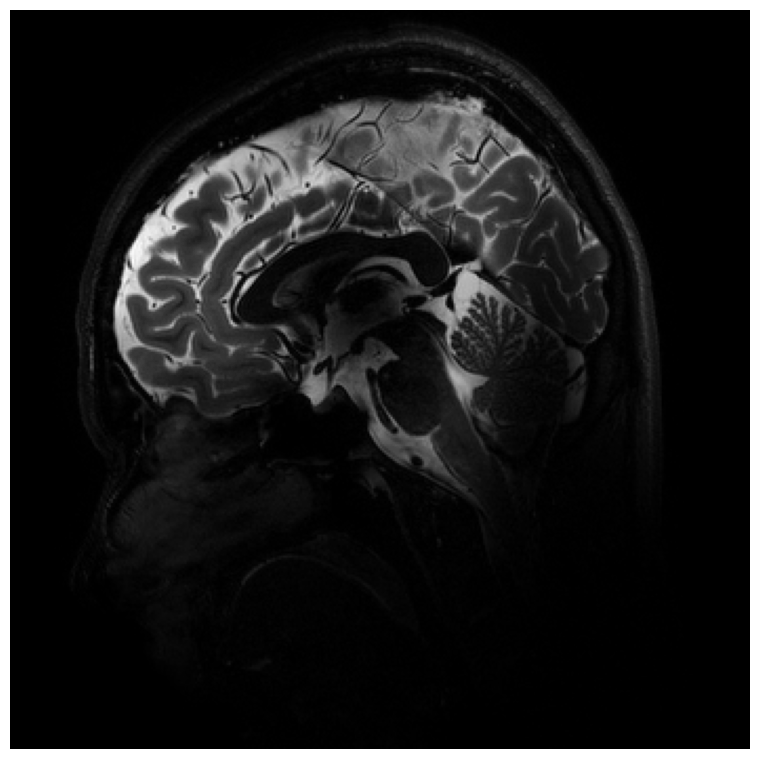

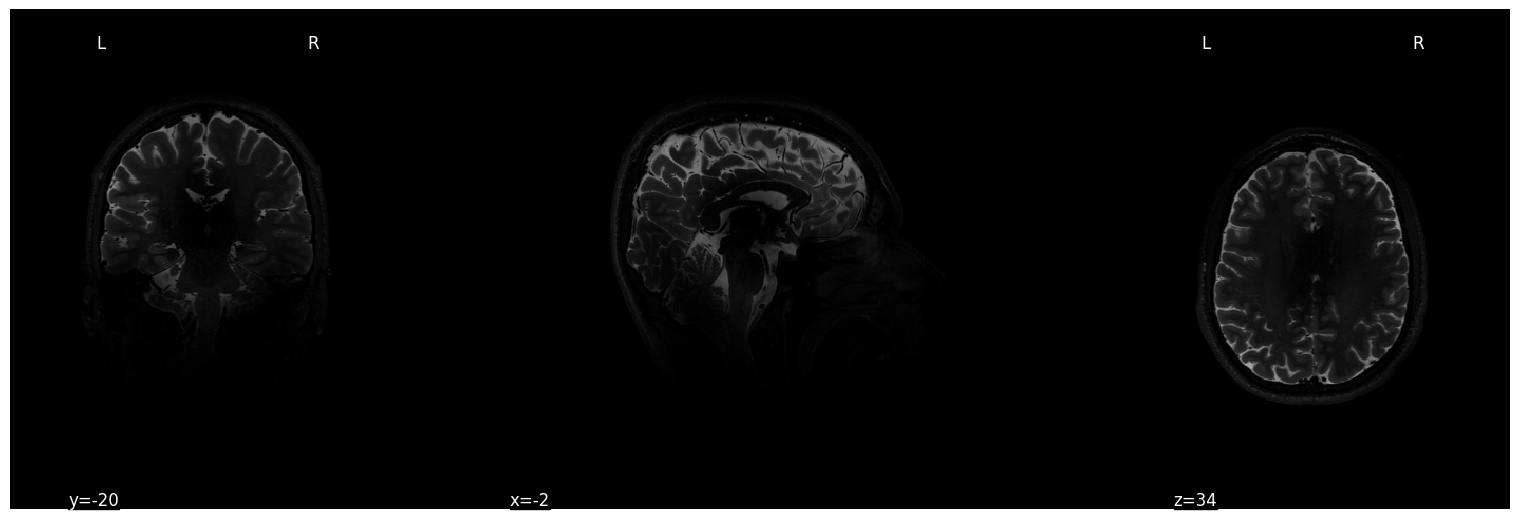

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

# Load the NIfTI file
nii_file = '/data1/projects/dumoulinlab/Lab_members/Marco/SM-pRF/sub-011/ses-0/anat/sub-011_ses-0_acq-3DTSE_T2w.nii.gz'
img = nib.load(nii_file)

# Get the image data array
data = img.get_fdata()

# Display a single slice (e.g., the middle slice in the axial plane)
mid_slice = data.shape[2] // 2

plt.figure(figsize=(plt.rcParams["figure.figsize"][0] * 2, plt.rcParams["figure.figsize"][1] * 2))

#plt.imshow(data[:, :, mid_slice], cmap='gray')
#rotate the image 90 degrees
plt.imshow(np.rot90(data[:, :, mid_slice]), cmap='gray')
plt.axis('off')
plt.show()



# Alternatively, use nilearn to display the image with more context
plotting.plot_anat(nii_file, display_mode='ortho', draw_cross=False, figure=plt.figure(figsize=(15, 5)))

plotting.show()


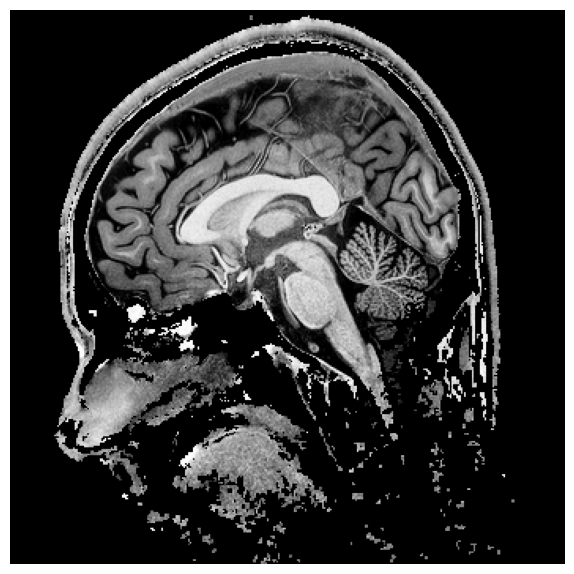

/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/TomVenv/lib/python3.8/site-packages/nilearn/image/resampling.py:591: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


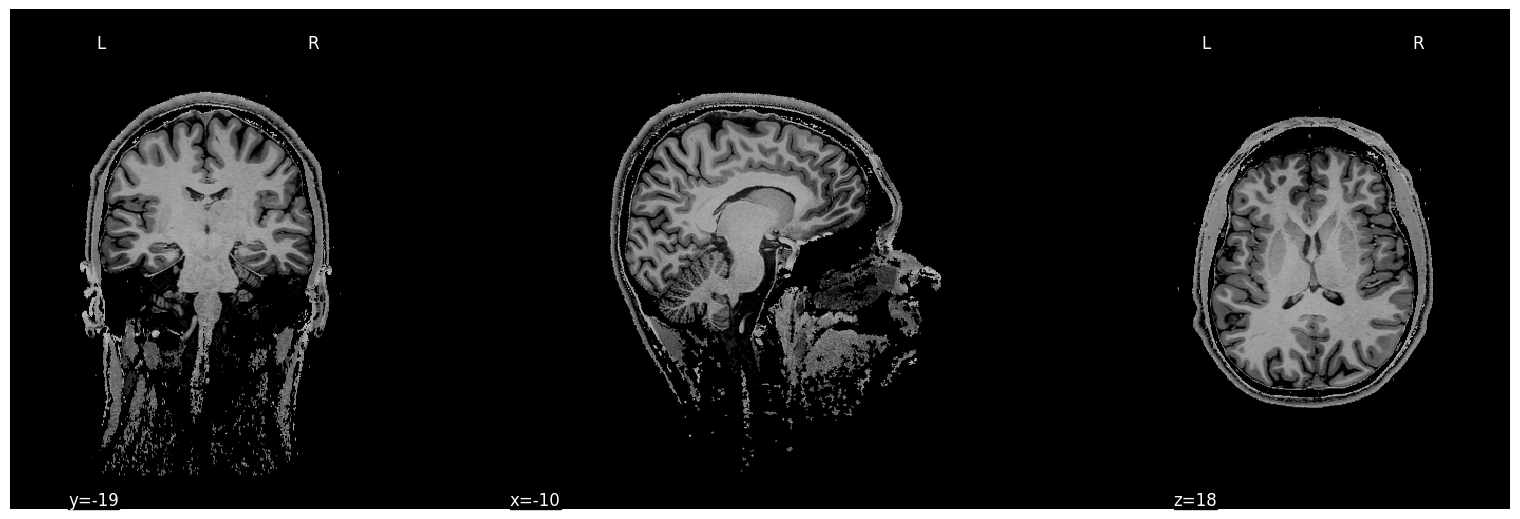

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

# Load the NIfTI file
nii_file = '/data1/projects/dumoulinlab/Lab_members/Marco/SM-pRF/sub-011/ses-0/anat/sub-011_ses-0_acq-MP2RAGE_T1w.nii.gz'
img = nib.load(nii_file)

# Get the image data array
data = img.get_fdata()

# Display a single slice (e.g., the middle slice in the axial plane)
mid_slice = data.shape[2] // 2

plt.figure(figsize=(plt.rcParams["figure.figsize"][0] * 1.5, plt.rcParams["figure.figsize"][1] * 1.5))

#plt.imshow(data[:, :, mid_slice], cmap='gray')
#rotate the image 90 degrees
plt.imshow(np.rot90(data[:, :, mid_slice]), cmap='gray')
plt.axis('off')
plt.show()



# Alternatively, use nilearn to display the image with more context
plotting.plot_anat(nii_file, display_mode='ortho', draw_cross=False, figure=plt.figure(figsize=(15, 5)))

plotting.show()


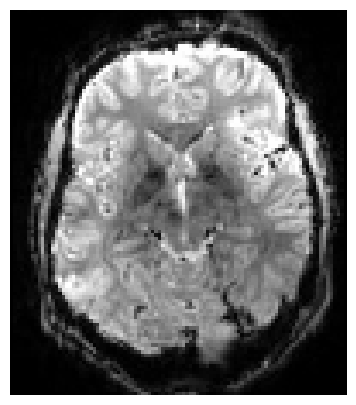

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Path to your functional MRI data file
fmri_file_path = '/data1/projects/dumoulinlab/Lab_members/Marco/SM-pRF/sub-011/ses-2/func/sub-011_ses-2_task-movie_run-1_acq-3DEPI_bold.nii.gz'

# Load the NIfTI file
fmri_img = nib.load(fmri_file_path)

# Get the data from the image
fmri_data = fmri_img.get_fdata()

# Select a time point to visualize, here we choose the first time point (timepoint = 0)
# You can change the time point to visualize different points in the time series
timepoint = 0

# Select the slice number, here we choose the middle slice in the Z-axis
slice_num = fmri_data.shape[2] // 2

# Extract the slice from the 4D fMRI data
slice_data = fmri_data[:, :, slice_num, timepoint]

# Plot the slice
plt.figure(figsize=(5, 5))  # Increase the size of the output image
plt.imshow(slice_data.T, cmap='gray', origin='lower')

# Optionally, you can remove the axis for a cleaner look
plt.axis('off')

# Display the image
plt.show()
